In [373]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import pickle
import numpy as np
import matplotlib.cm as cm
from sklearn.metrics.pairwise import cosine_similarity as cs
import pandas as pd
import os
import unicodedata
import pandas
from MulticoreTSNE import MulticoreTSNE as TSNE

In [193]:
######
##Loading gensim models to load pretrained and trained embeddings to appreciate the difference between them.
######
from gensim.models import Word2Vec,KeyedVectors
import nltk
from gensim.scripts.glove2word2vec import glove2word2vec


unable to import 'smart_open.gcs', disabling that module


In [36]:
pre_vocab = []
pre = open("../../nlp/project/gensim_glove_vectors.txt",'r')
for line in pre:
    embeds = line.rstrip().split(" ")
    word = embeds[0]
    vocab.append(word)

In [37]:
pre_w = np.zeros((len(pre_vocab),300))
for i,line in enumerate(pre):
    embeds = line.rstrip().split(" ")
    word = embeds[0]
    pre_w[i,:] = embeds[1:]


In [ ]:
##########
##Converting pre glove embeddings to numpy matrix where each row contains embedding of a word.
##Adding words to "word to id" and "id to word" maps
##########
pre_w2id = {}
for i in range(len(pre_vocab)):
    pre_w2id[pre_vocab[i]] = i
    

In [39]:
######
##Applying PCA to reduce the dimension of the embedding from 300D to 2D.
######

tsne = TSNE(n_jobs=12)
pre_2d = tsne.fit_transform(pre_w)


In [4]:
####
# Loading glove embeddings from pickle file glove_new.pickle and writing into embedding map and a text file which
# can be used to gensim model
####
file = open("glove_new.pickle",'rb')
embedding_map = pickle.load(file)

In [470]:
##########
##Converting glove embeddings to numpy matrix where each row contains embedding of a word.
##Adding words to "word to id" and "id to word" maps
##########
w2id = {}
id2w = {}
w = np.zeros((len(embedding_map.keys()),300))

for i,word in enumerate(embedding_map.keys()):
    w2id[word] = i
    id2w[i] = word
    w[i] = embedding_map[word]


In [6]:
######
##Applying PCA to reduce the dimension of the embedding from 300D to 2D.
######

tsne = TSNE(n_jobs=12)
post_2d = tsne.fit_transform(w)

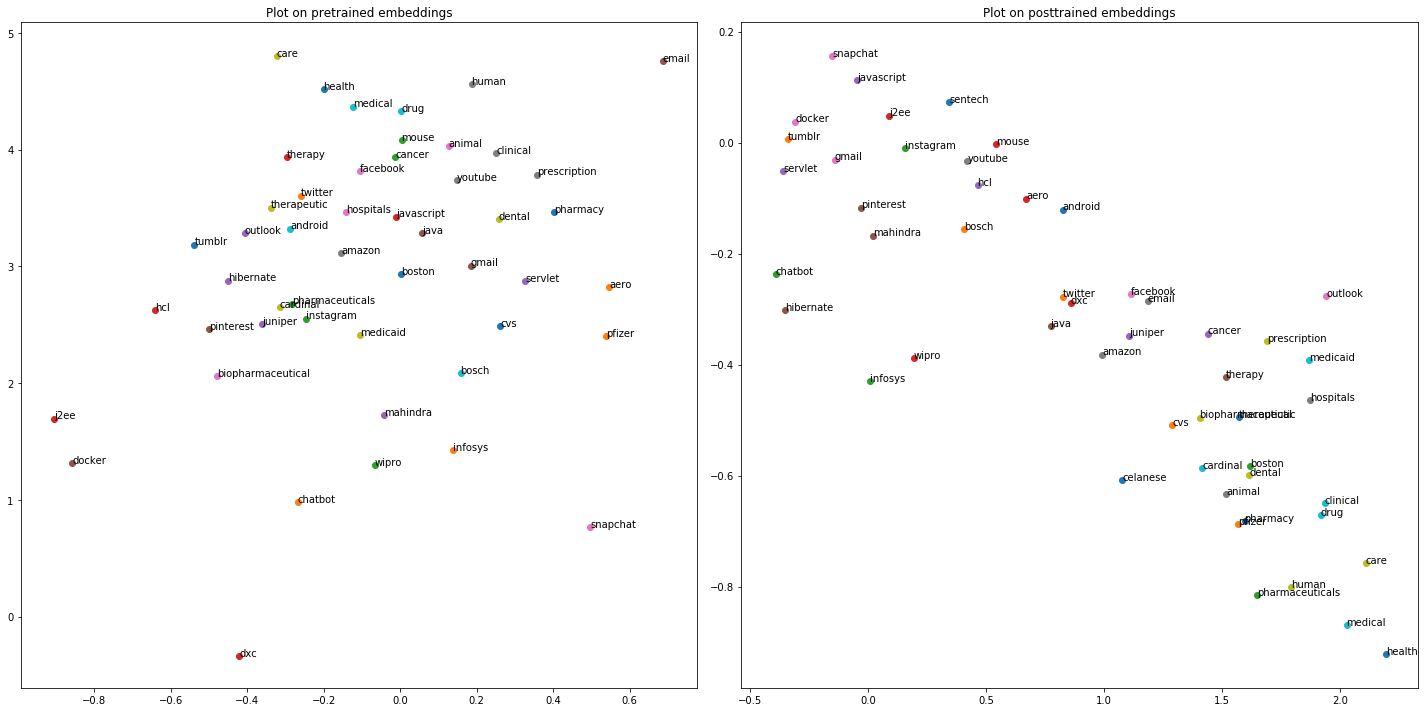

In [486]:
words = ['health','pfizer','pharmaceuticals','dxc','juniper','java','facebook',
         'amazon','care','medical','pharmacy','twitter','instagram','j2ee','servlet','pinterest','snapchat',
         'youtube','dental','drug','sentech','cvs','infosys','wipro','hcl','mahindra','gmail',
         'hospitals','prescription','medicaid','android','tumblr','chatbot','mouse','javascript',
        'hibernate','docker','animal','human','cardinal','celanese','bosch','boston','aero','cancer',
        'therapy','outlook','email','biopharmaceutical','clinical','therapeutic']


#words = ['cloud','saas','sky','ash','dust','computing','analytics']
fig, axs = plt.subplots(nrows=1, ncols=2,figsize=(20, 10))
for i,word in enumerate(words):
    if word in pre_w2id:
        p = pre_2d[pre_w2id[word]]
        axs[0].scatter(p[0],p[1])
        axs[0].annotate(word,(p[0],p[1]))
axs[0].title.set_text('Plot on pretrained embeddings')


for i,word in enumerate(words):
    p = post_2d[w2id[word]]
    axs[1].scatter(p[0],p[1])
    axs[1].annotate(word,(p[0],p[1]))
axs[1].title.set_text('Plot on posttrained embeddings')
fig.tight_layout()


In [473]:
def cosine_similarity(word1,word2):
    word1_vec = w[w2id[word1]]
    word2_vec = w[w2id[word2]]
    dot = np.dot(word1_vec,word2_vec)
    magnitude = np.linalg.norm(word1_vec)*np.linalg.norm(word2_vec)
    cosine_sim = dot/magnitude
    return cosine_sim

In [503]:
cosine_similarity('profit','bankruptcy')

0.03523096313349539

In [228]:
w_list = ['profit','positive','improved','debt','borrowings','unsecured']

scores = np.zeros((len(w_list),len(w_list)))
for i in range(len(w_list)):
    for j in range(i,len(w_list)):
        scores[i][j] = cosine_similarity(w_list[i],w_list[j])
        scores[j][i] = scores[i][j]
df = pd.DataFrame(data=scores,    # values
        index=w_list,    # 1st column as index
        columns=w_list)
print(df)

              profit  positive  improved      debt  borrowings  unsecured
profit      1.000000  0.306207  0.478345  0.199394    0.194890   0.128565
positive    0.306207  1.000000  0.398259  0.238096    0.211696   0.187966
improved    0.478345  0.398259  1.000000  0.247966    0.211221   0.166169
debt        0.199394  0.238096  0.247966  1.000000    0.554353   0.528045
borrowings  0.194890  0.211696  0.211221  0.554353    1.000000   0.512907
unsecured   0.128565  0.187966  0.166169  0.528045    0.512907   1.000000


In [194]:
###### Gensim Model for trained embeddings on 10k corpus
post_model = KeyedVectors.load_word2vec_format('glove_vectors_10k.txt',binary=False)

In [504]:
###### Most similar words of a given word from trained embeddings
pre_model.most_similar(positive=['profit'])

[('margins', 0.6303351521492004),
 ('gross', 0.6082963943481445),
 ('sharing', 0.5735119581222534),
 ('margin', 0.5703713297843933),
 ('revenues', 0.5321364402770996),
 ('percentage', 0.5318541526794434),
 ('decreased', 0.5300598740577698),
 ('profitability', 0.521300733089447),
 ('contribution', 0.5040483474731445),
 ('profits', 0.5016102194786072)]

In [450]:
######Gensim Model for pretrained embeddings on wiki and book corpus
post_model = KeyedVectors.load_word2vec_format('../../nlp/project/gensim_glove_vectors.txt',binary=False)